In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define data transform (Convert to tensors and normalize)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Convert training data to numpy arrays
train_images = train_dataset.data.numpy().reshape((60000, 28 * 28)).astype('float32') / 255
train_labels = torch.zeros(60000, 10).scatter_(1, train_dataset.targets.unsqueeze(1), 1).numpy()

# Convert test data to numpy arrays
test_images = test_dataset.data.numpy().reshape((10000, 28 * 28)).astype('float32') / 255
test_labels = torch.zeros(10000, 10).scatter_(1, test_dataset.targets.unsqueeze(1), 1).numpy()


In [7]:
class ThreeLayerNN(nn.Module):
    def __init__(self, input_dim, hidden1_dim, output_dim):
        super(ThreeLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden1_dim)
        self.fc2 = nn.Linear(hidden1_dim, output_dim)

#    def forward(self, x):
#        x = torch.sigmoid(self.fc1(x))
#        x = nn.Softmax(dim=1)(self.fc2(x))
#        return x

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x


input_dim = 784
hidden1_dim = 300
output_dim = 10

model = ThreeLayerNN(input_dim, hidden1_dim, output_dim)


Epoch 1/30, Test Error Rate: 14.47%
Epoch 2/30, Test Error Rate: 10.93%
Epoch 3/30, Test Error Rate: 9.86%
Epoch 4/30, Test Error Rate: 9.35%
Epoch 5/30, Test Error Rate: 8.97%
Epoch 6/30, Test Error Rate: 8.67%
Epoch 7/30, Test Error Rate: 8.37%
Epoch 8/30, Test Error Rate: 8.23%
Epoch 9/30, Test Error Rate: 7.82%
Epoch 10/30, Test Error Rate: 7.87%
Epoch 11/30, Test Error Rate: 7.87%
Epoch 12/30, Test Error Rate: 7.45%
Epoch 13/30, Test Error Rate: 7.33%
Epoch 14/30, Test Error Rate: 7.20%
Epoch 15/30, Test Error Rate: 7.02%
Epoch 16/30, Test Error Rate: 6.66%
Epoch 17/30, Test Error Rate: 6.59%
Epoch 18/30, Test Error Rate: 6.58%
Epoch 19/30, Test Error Rate: 6.35%
Epoch 20/30, Test Error Rate: 6.24%
Epoch 21/30, Test Error Rate: 6.05%
Epoch 22/30, Test Error Rate: 6.07%
Epoch 23/30, Test Error Rate: 5.87%
Epoch 24/30, Test Error Rate: 5.89%
Epoch 25/30, Test Error Rate: 5.53%
Epoch 26/30, Test Error Rate: 5.43%
Epoch 27/30, Test Error Rate: 5.34%
Epoch 28/30, Test Error Rate: 5.30%

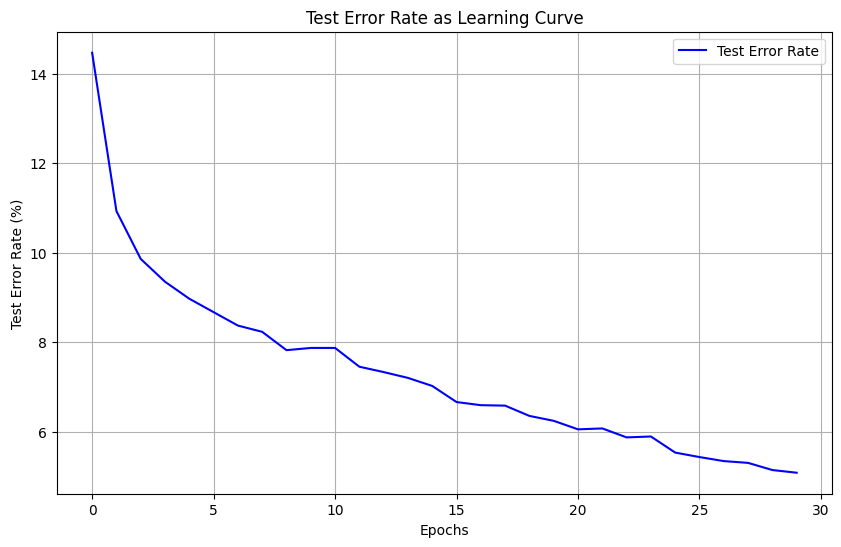

In [8]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Hyperparameters
learning_rate = 0.01
batch_size = 32
num_epochs = 30
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

test_errors = []

for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Flatten the input data
        data = data.view(data.shape[0], -1)

        # Forward
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate the model at the end of each epoch
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, targets in test_loader:
            data = data.view(data.shape[0], -1)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    test_accuracy = 100 * correct / total
    test_error = 100 - test_accuracy
    test_errors.append(test_error)
    print(f"Epoch {epoch+1}/{num_epochs}, Test Error Rate: {test_error:.2f}%")

# Plotting the test error
plt.figure(figsize=(10,6))
plt.plot(range(num_epochs), test_errors, label='Test Error Rate', color='blue')
plt.title('Test Error Rate as Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Test Error Rate (%)')
plt.legend()
plt.grid(True)
plt.show()



Training with zeros initialization:
Epoch 1/30, Test Error Rate: 88.65%
Epoch 2/30, Test Error Rate: 88.65%
Epoch 3/30, Test Error Rate: 88.65%
Epoch 4/30, Test Error Rate: 88.65%
Epoch 5/30, Test Error Rate: 88.65%
Epoch 6/30, Test Error Rate: 88.65%
Epoch 7/30, Test Error Rate: 88.65%
Epoch 8/30, Test Error Rate: 88.65%
Epoch 9/30, Test Error Rate: 88.65%
Epoch 10/30, Test Error Rate: 88.65%
Epoch 11/30, Test Error Rate: 88.65%
Epoch 12/30, Test Error Rate: 88.65%
Epoch 13/30, Test Error Rate: 88.65%
Epoch 14/30, Test Error Rate: 88.65%
Epoch 15/30, Test Error Rate: 88.65%
Epoch 16/30, Test Error Rate: 88.65%
Epoch 17/30, Test Error Rate: 88.65%
Epoch 18/30, Test Error Rate: 88.65%
Epoch 19/30, Test Error Rate: 88.65%
Epoch 20/30, Test Error Rate: 88.65%
Epoch 21/30, Test Error Rate: 88.65%
Epoch 22/30, Test Error Rate: 88.65%
Epoch 23/30, Test Error Rate: 88.65%
Epoch 24/30, Test Error Rate: 88.65%
Epoch 25/30, Test Error Rate: 88.65%
Epoch 26/30, Test Error Rate: 88.65%
Epoch 27/3

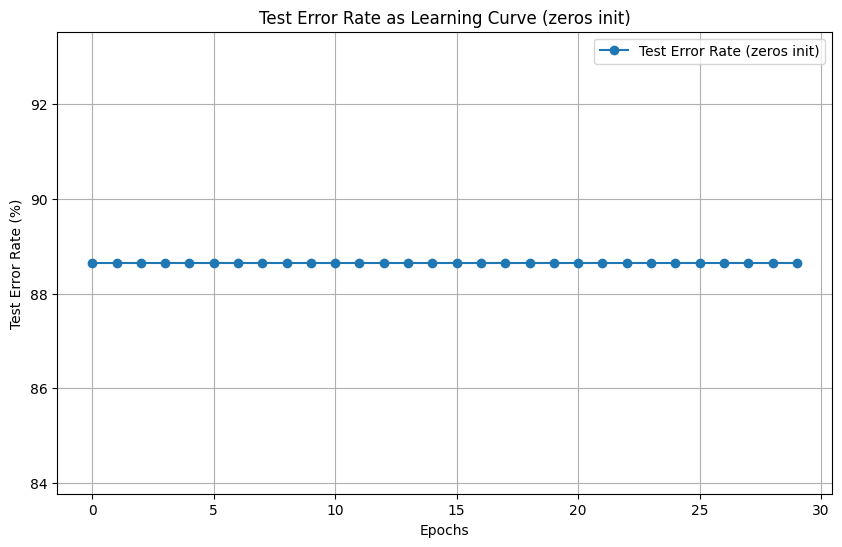

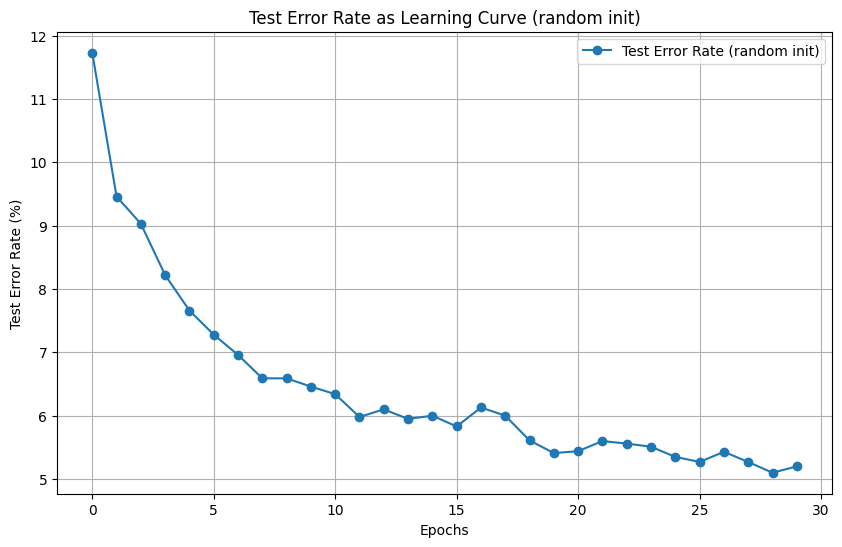

In [9]:
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, init_method='random'):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

        if init_method == 'zeros':
            init.zeros_(self.fc1.weight)
            init.zeros_(self.fc1.bias)
            init.zeros_(self.fc2.weight)
            init.zeros_(self.fc2.bias)
        elif init_method == 'random':
            init.uniform_(self.fc1.weight, -1, 1)
            init.uniform_(self.fc1.bias, -1, 1)
            init.uniform_(self.fc2.weight, -1, 1)
            init.uniform_(self.fc2.bias, -1, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 设置超参数和模型参数
input_dim = 28*28
hidden_dim = 300
output_dim = 10

# 存储两种初始化方法的错误率
errors = {'zeros': [], 'random': []}

for init_method in ['zeros', 'random']:
    print(f"\nTraining with {init_method} initialization:")
    model = SimpleNN(input_dim, hidden_dim, output_dim, init_method=init_method)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    test_errors = []
    for epoch in range(num_epochs):
        for batch_idx, (data, targets) in enumerate(train_loader):
            data = data.view(data.shape[0], -1)
            outputs = model(data)
            loss = criterion(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for data, targets in test_loader:
                data = data.view(data.shape[0], -1)
                outputs = model(data)
                _, predicted = torch.max(outputs.data, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()

        test_accuracy = 100 * correct / total
        test_error = 100 - test_accuracy
        test_errors.append(test_error)
        print(f"Epoch {epoch+1}/{num_epochs}, Test Error Rate: {test_error:.2f}%")

    errors[init_method] = test_errors

# Plotting the test errors
for init_method, test_errors in errors.items():
    plt.figure(figsize=(10,6))
    plt.plot(range(num_epochs), test_errors, '-o', label=f'Test Error Rate ({init_method} init)')
    plt.title(f'Test Error Rate as Learning Curve ({init_method} init)')
    plt.xlabel('Epochs')
    plt.ylabel('Test Error Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

